# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Rivaditya Azzaka]
- **Email:** [m012b4ky3048@bangkit.academy]
- **ID Dicoding:** [Adit Azzaka]

## Menentukan Pertanyaan Bisnis

## Pertanyaan Bisnis

1. Bagaimana distribusi penggunaan sepeda oleh pengguna kasual dan terdaftar berdasarkan waktu (jam dalam sehari)?

2. Bagaimana pola penggunaan sepeda yang dipengaruhi oleh musim, baik itu oleh pengguna sepeda casual maupun yang registered
   
3. Bagaimana perbandingan tren penggunaan sepeda dalam kurun waktu satu tahun yaitu antara tahun 2011 dan tahun 2012

## Import Semua Packages/Library yang Digunakan

Impor libraries yang diperlukan untuk analisis data, visualisasi data, dan manipulasi waktu, termasuk pandas, numpy, matplotlib, dan seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Memuat dataset harian (day_df) dan dataset per jam (hour_df) dari file CSV. Dataset ini berisi informasi mengenai jumlah pengguna sepeda, kondisi cuaca, dan waktu.

In [ ]:
# Load dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Setting default visualisasi
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

In [ ]:
# Melihat beberapa baris pertama dataset harian
print(day_df.head())

# Informasi umum dataset harian
print(day_df.info())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [ ]:
# Melihat beberapa baris pertama dataset harian
print(hour_df.head())

# Informasi umum dataset harian
print(hour_df.info())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 

### Assessing Data

In [ ]:
# Statistik deskriptif dataset harian
print(day_df.describe())

# Mengecek apakah ada missing values
print(day_df.isnull().sum())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [ ]:
# Statistik deskriptif dataset hour
print(hour_df.describe())

# Mengecek apakah ada missing values
print(hour_df.isnull().sum())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Cleaning Data

Menghapus duplikasi data (jika ada)

In [ ]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

Beberapa informasi dalam beberapa kolom kurang jelas atau tidak sesuai dengan pemahaman pengguna, sehingga saya mengubahnya. Agar lebih mudah dipahami, saya juga mengonversi data tertentu, seperti season, month, weekday, dan year, ke dalam bentuk kategorikal.

In [ ]:
# Mengubah beberapa informasi pada kolom
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count',
    'hr': 'hour'
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun', 7: 'Jul', 8: 'Ags', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
})

hour_df['season'] = hour_df['season'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})

hour_df['year'] = hour_df['year'].map({
    0: '2011', 1: '2012'
})

hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})


In [ ]:
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])

In [ ]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Semi,2011,Jan,0,0,Sabtu,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,Jan,1,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,Jan,2,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,Jan,3,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,Jan,4,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Statistik deskriptif untuk variabel numerik
print(day_df.describe())

# Distribusi variabel kategorikal
print(day_df['season'].value_counts())
print(day_df['weathersit'].value_counts())
print(day_df['workingday'].value_counts())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

Membuat heatmap korelasi untuk memahami hubungan antar variabel numerik dalam dataset. Visualisasi ini membantu dalam memahami seberapa kuat pengaruh tiap variabel terhadap jumlah pengguna sepeda.

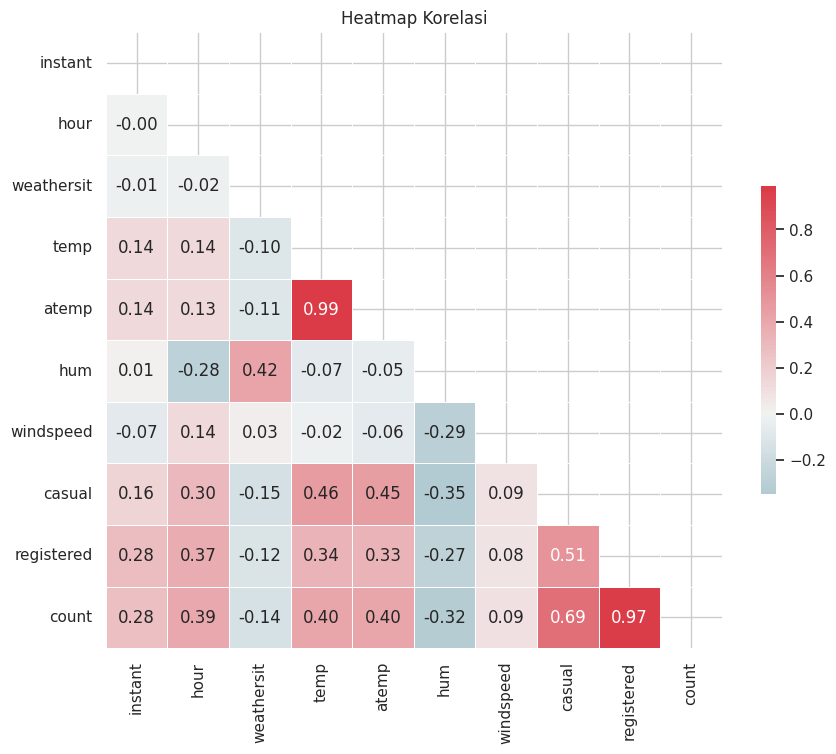

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap=cmap,
    center=0,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns)

plt.title("Heatmap Korelasi")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Distribusi Pengguna Kasual dan Terdaftar Sepanjang Hari


Pengguna Kasual: Terlihat bahwa pengguna kasual lebih banyak menggunakan sepeda pada jam siang hingga sore hari, yaitu sekitar pukul 10:00 hingga 18:00. Hal ini menunjukkan pola rekreasi atau kegiatan santai yang dilakukan oleh pengguna kasual.

Pengguna Terdaftar: Pengguna terdaftar memiliki puncak penggunaan pada jam-jam sibuk, seperti pagi (sekitar pukul 8:00) dan sore (sekitar pukul 17:00), menunjukkan penggunaan yang terkait dengan perjalanan kerja.

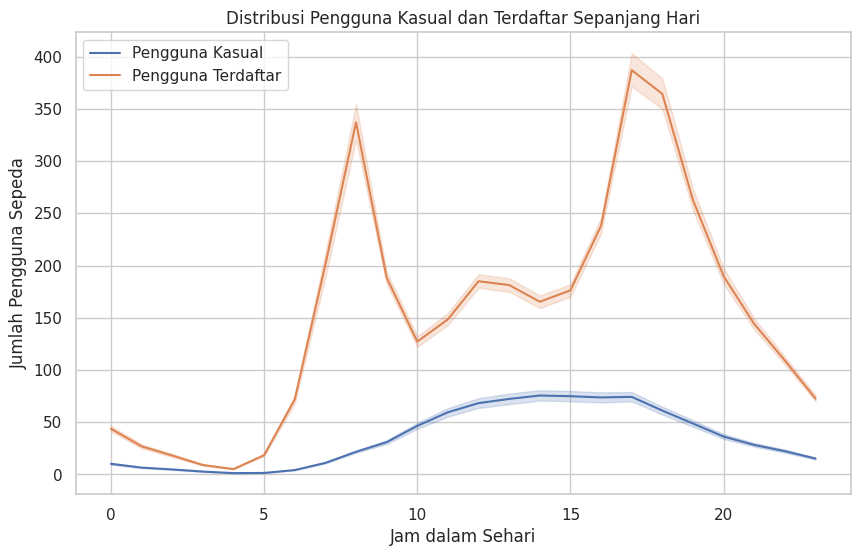

In [ ]:
# Visualisasi penggunaan sepeda berdasarkan jam dan tipe pengguna
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='casual', data=hour_df, label='Pengguna Kasual')
sns.lineplot(x='hour', y='registered', data=hour_df, label='Pengguna Terdaftar')
plt.title('Distribusi Pengguna Kasual dan Terdaftar Sepanjang Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend()
plt.show()

### Pertanyaan 2:

Pengguna sepeda, baik kasual maupun terdaftar, lebih aktif selama musim semi dan musim panas, sementara jumlah pengguna berkurang di musim dingin.
Pengguna Kasual: Menunjukkan sensitivitas yang lebih tinggi terhadap perubahan musim, dengan penurunan penggunaan yang tajam di musim dingin. Hal ini kemungkinan besar dipengaruhi oleh kenyamanan cuaca.
Pengguna Terdaftar: Meski juga menunjukkan penurunan di musim dingin, pengguna terdaftar lebih konsisten menggunakan sepeda sepanjang tahun.

<ipython-input-48-458b3a46e4fe>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = hour_df.groupby('season')[['registered', 'casual']].sum().reset_index()


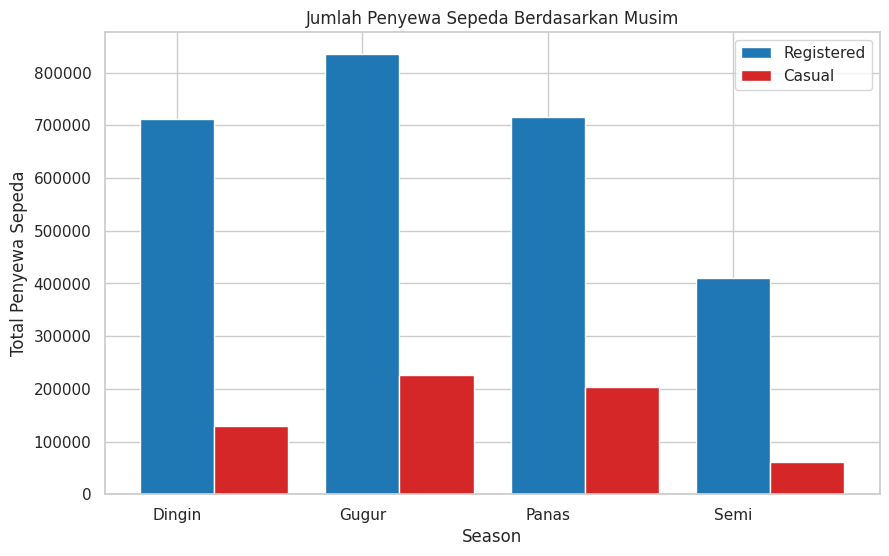

In [ ]:
seasonal_usage = hour_df.groupby('season')[['registered', 'casual']].sum().reset_index()
plt.figure(figsize=(10, 6))
bar_width = 0.4
bar_position_reg = [1, 2, 3, 4]
bar_position_cas = [x + bar_width for x in bar_position_reg]

plt.bar(
    bar_position_reg,
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue',
    width=bar_width
)

plt.bar(
    bar_position_cas,
    seasonal_usage['casual'],
    label='Casual',
    color='tab:red',
    width=bar_width
)

plt.xlabel('Season')
plt.ylabel('Total Penyewa Sepeda')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim')

season_labels = sorted(hour_df['season'].unique())
plt.xticks(bar_position_reg, season_labels)

plt.legend()
plt.show()


### Pertanyaan 3:

### Perbandingan tren penggunaan sepeda dalam kurun waktu satu tahun yaitu antara tahun 2011 dan tahun 2012

Tren penggunaan sepeda meningkat secara signifikan dari tahun 2011 ke 2012, khususnya pada bulan-bulan musim semi dan musim panas. Hal ini mungkin disebabkan oleh peningkatan popularitas layanan sepeda atau promosi bisnis yang dilakukan pada tahun 2012.
Terlepas dari musim, jumlah pengguna pada tahun 2012 menunjukkan pola penggunaan yang lebih tinggi dibandingkan dengan tahun 2011, yang menunjukkan adanya pertumbuhan pengguna terdaftar atau peningkatan aktivitas dari pengguna kasual.

<ipython-input-49-4c30ed84f6fa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = hour_df.groupby(by=["month", "year"]).agg({"count": "sum"}).reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


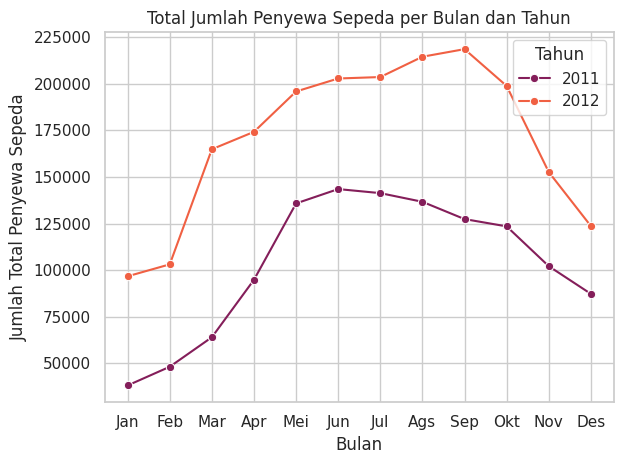

In [ ]:
hour_df['month'] = pd.Categorical(hour_df['month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'], ordered=True)

monthly_counts = hour_df.groupby(by=["month", "year"]).agg({"count": "sum"}).reset_index()
sns.lineplot(data=monthly_counts, x="month", y="count", hue="year",
             palette="rocket", marker="o")

plt.title("Total Jumlah Penyewa Sepeda per Bulan dan Tahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Total Penyewa Sepeda")

plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

## Conclusion
- Conclusion 1
Distribusi penggunaan sepeda oleh pengguna kasual dan terdaftar menunjukkan pola yang berbeda sepanjang hari. Pengguna terdaftar memiliki puncak penggunaan pada jam sibuk pagi dan sore hari, mengindikasikan bahwa sepeda banyak digunakan sebagai moda transportasi untuk berangkat dan pulang kerja. Sementara itu, pengguna kasual lebih aktif di siang hingga sore hari, yang kemungkinan besar terkait dengan aktivitas rekreasi. Kesimpulan ini dapat membantu bisnis dalam perencanaan logistik, dengan mengalokasikan lebih banyak sepeda di titik-titik yang banyak digunakan pada jam-jam tertentu, terutama bagi pengguna terdaftar.


- Conclusion 2
Pengaruh musim terhadap penggunaan sepeda sangat terlihat, di mana musim semi dan musim panas menjadi periode dengan jumlah penggunaan tertinggi untuk kedua jenis pengguna. Namun, pengguna kasual lebih sensitif terhadap perubahan musim, dengan penurunan tajam selama musim dingin. Sebaliknya, pengguna terdaftar lebih konsisten menggunakan sepeda sepanjang tahun. Bisnis dapat memanfaatkan temuan ini untuk melakukan pemeliharaan sepeda di musim dingin dan meluncurkan promosi khusus yang menargetkan pengguna kasual agar tetap tertarik untuk menggunakan sepeda selama musim tersebut.


- Conclusion 3
Perbandingan penggunaan sepeda antara tahun 2011 dan 2012 menunjukkan adanya pertumbuhan yang signifikan, terutama pada musim semi dan musim panas di tahun 2012. Hal ini mungkin mencerminkan peningkatan popularitas layanan atau keberhasilan promosi pada tahun 2012. Pertumbuhan yang konsisten ini menunjukkan adanya potensi pasar yang lebih besar, sehingga bisnis dapat mempertimbangkan penambahan kapasitas sepeda atau ekspansi layanan di masa depan. Menyusun strategi promosi atau penawaran khusus yang lebih intensif di awal musim semi bisa menjadi langkah strategis untuk memanfaatkan lonjakan permintaan di bulan-bulan tersebut.
